In [2]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.utils import to_categorical

# MNIST dataset!
미리 제공된 데이터셋에 대해서 불러온다.
검은색 부분은 ‘0’, 색이 있는 부분은 ‘0’이 아닌 수로 저장하고 있는 데이터셋(0~9까지의 손글씨 수) - 60,000개 training set, 10,000개 test set으로 이루어져있다.

In [3]:
(x_train, y_train), (x_test, y_test) =  keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape, 'image shape')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
(28, 28) image shape


결과에서 보이는 것처럼 28x28의 1 channel인데, 이걸 임의적으로 늘려주고자 한다면, 어떻게 해야할까?

In [5]:
x_train = x_train[:, :, :, np.newaxis]
x_test = x_test[:, :, :, np.newaxis]

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].shape, 'image shape')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(28, 28, 1) image shape


In [6]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [7]:
num_classes =10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [8]:
y_train.shape

(60000, 10)

In [9]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

데이터 정규화과정을 통하면?

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [11]:
input_shape = x_train[0].shape

In [12]:
model = keras.models.Sequential([

  keras.layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=input_shape, padding="same"),
  keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
  keras.layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
  keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),

  keras.layers.Conv2D(120,kernel_size=(5, 5), strides = (1,1), activation = 'tanh', padding='valid'),
  keras.layers.Flatten(),
  keras.layers.Dense(120, activation='tanh'),
  keras.layers.Dense(84, activation='tanh'),
  keras.layers.Dense(num_classes, activation='softmax')
  
])



# padding을 진행하지않기 때문에 valid로 설정해준다.
# 관련 모델의 내용은 노션에 정리해두었다.


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [14]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
y_train.shape

(60000, 10)

In [16]:
history = model.fit(x_train, y=y_train, 
          epochs=10, 
          batch_size = 32,
          validation_data=(x_test, y_test) )

Epoch 1/10
1875/1875 [==============================] - 19s 4ms/step - loss: 0.8350 - accuracy: 0.7074 - val_loss: 0.5979 - val_accuracy: 0.7778
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5295 - accuracy: 0.8078 - val_loss: 0.5274 - val_accuracy: 0.8087
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4659 - accuracy: 0.8324 - val_loss: 0.4893 - val_accuracy: 0.8161
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4279 - accuracy: 0.8464 - val_loss: 0.4445 - val_accuracy: 0.8370
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4037 - accuracy: 0.8545 - val_loss: 0.4214 - val_accuracy: 0.8484
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3846 - accuracy: 0.8606 - val_loss: 0.4073 - val_accuracy: 0.8542
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3697 - accuracy: 0.8667 - val_loss: 0.3979 - val_accuracy

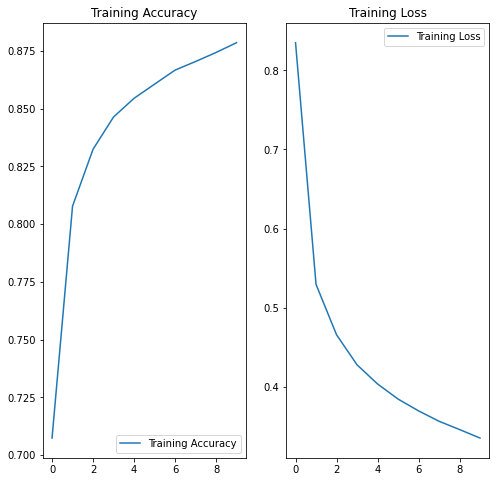

In [18]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

In [19]:
test_score = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3627 - accuracy: 0.8698


In [20]:
print('Test loss {:.4f}, accuracy {:.2f}%'.format(test_score[0], test_score[1] * 100))

Test loss 0.3627, accuracy 86.98%
